In [5]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

In [6]:
Xtest = np.load(r"C:\Users\Fahmi Bakhir\Desktop\Video_Forgery_Detection_Using_Machine_Learning-master\Video_Forgery_Detection_Using_Machine_Learning-master\video_tampering_dataset\Xtrain.npy")
Ytest = np.load(r"C:\Users\Fahmi Bakhir\Desktop\Video_Forgery_Detection_Using_Machine_Learning-master\Video_Forgery_Detection_Using_Machine_Learning-master\video_tampering_dataset\Ytrain.npy")

In [7]:
print(Xtest.shape)
print(Ytest.shape)

(6990, 240, 320, 3)
(6990,)


In [8]:
model = load_model(r"C:\Users\Fahmi Bakhir\Desktop\Video_Forgery_Detection_Using_Machine_Learning-master\Video_Forgery_Detection_Using_Machine_Learning-master/ResNet50_Model/forgery_model.hdf5")

In [9]:
outputs = model.predict(Xtest)

219/219 [==============================] - 1704s 8s/step


In [18]:
outputs = outputs.reshape((-1))
print(outputs.shape)

(6990,)


In [19]:
for i in range(outputs.shape[0]):
    if outputs[i] > 0.5:
        outputs[i] = 1
    else:
        outputs[i] = 0

In [20]:
print(outputs)

[0. 0. 0. ... 0. 0. 1.]


In [13]:
positiveCount = 0
for i in range(Xtest.shape[0]):
    if outputs[i] == Ytest[i]:
        positiveCount +=1

print("Test Accuracy = ",positiveCount/Ytest.shape[0])

Test Accuracy =  0.7988555078683834


In [14]:
from sklearn.metrics import classification_report,confusion_matrix
from visualize import plot_confusion_matrix

In [15]:
print(classification_report(outputs,Ytest))

              precision    recall  f1-score   support

         0.0       0.99      0.79      0.88      6581
         1.0       0.21      0.88      0.34       409

    accuracy                           0.80      6990
   macro avg       0.60      0.84      0.61      6990
weighted avg       0.95      0.80      0.85      6990



In [16]:
cnf_matrix = confusion_matrix(outputs,Ytest)
print(cnf_matrix)

[[5224 1357]
 [  49  360]]


Confusion matrix, without normalization
[[5224 1357]
 [  49  360]]


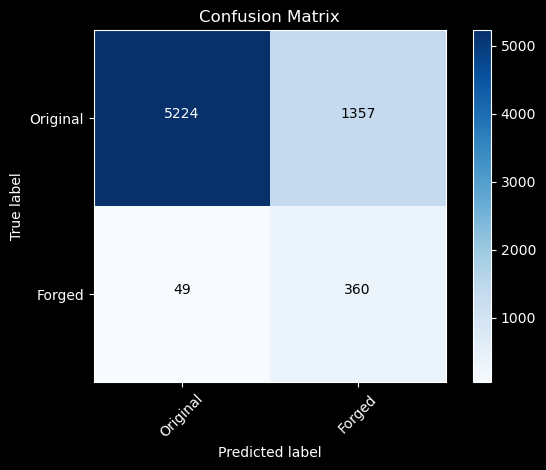

In [17]:
plt.style.use('dark_background')
plot_confusion_matrix(cnf_matrix,classes = ["Original","Forged"],title="Confusion Matrix")